# Calculate vector embeddings


In [1]:
import lib
import pandas as pd
import matplotlib

In [3]:
# input_datapath = "data/english_free_text.csv"
# headers = ["whyRamLess", "whyCompMore", "whyProblemSoc", "encourage"]
# cols_to_embed = ["whyRamLess", "whyCompMore", "whyProblemSoc", "encourage"]
# index_col = 0

input_datapath = "data/gambling_feedback_data.csv"
headers = ["feedback","treatment","limit_on","block_on"]
cols_to_embed = ["feedback"]
index_col = None

In [5]:
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [6]:
# load & inspect dataset
df = pd.read_csv(input_datapath, index_col=index_col)
df = df[headers]

df = df.dropna()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print(df.shape)
df.head(2)


/var/folders/4c/5kctcgk55539047v8xy3clj80000gn/T/ipykernel_91935/3179908913.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,feedback,treatment,limit_on,block_on
0,good,4,0,0
1,no it was helpful,4,0,0


In [13]:
# # subsample to 1k most recent reviews and remove samples that are too long
# top_n = 1000
# # first cut to first 2k entries, assuming less than half will be filtered out
# df = df.tail(top_n * 2)

# questionId = 0  # the first question

# # omit reviews that are too long to embed
# df["n_tokens"] = df.iloc[:, questionId].apply(lambda x: lib.get_num_tokens(x))

# df = df[df.n_tokens <= max_tokens].tail(top_n)
# len(df)


## Count tokens


In [7]:
for col in cols_to_embed:
    print(f'Counting tokens for column "{col}"')
    df[col + "-num_tokens"] = df.loc[:, col].apply(lib.get_num_tokens)


df.to_csv(f"{input_datapath.split('.')[0]}_with_num_tokens.csv")

Counting tokens for column "feedback"


Token stats:

min: 1
max: 104
mean: 10
median: 7


<Axes: >

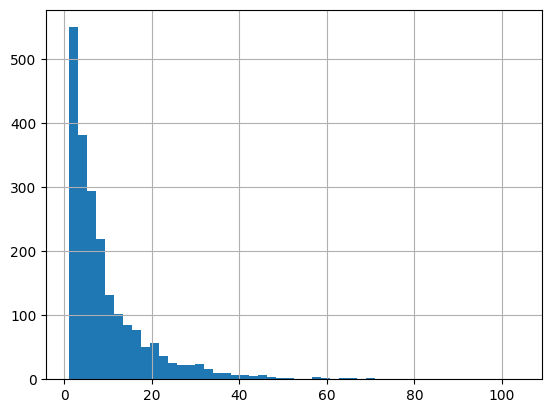

In [9]:

# print min, max, mean, median num tokens:
print(
    f"Token stats:\n\n======\nmin: {df['feedback-num_tokens'].min()}\nmax: {df['feedback-num_tokens'].max()}\nmean: {df['feedback-num_tokens'].mean().__round__()}\nmedian: {df['feedback-num_tokens'].median().__round__()}\n======"
)

df['feedback-num_tokens'].hist(bins=50)

## 2. Get embeddings and save them for future reuse


In [26]:
# This takes ~15 minutes on ~2000 samples with mean of 10 tokens/sample

for col in cols_to_embed:
    print(f'Getting embeddings for column "{col}"')
    # with_embeds = df.head().loc[:, col].apply(lib.get_embedding)
    df[col + "-embedding"] = df.loc[:, col].apply(lib.get_embedding)

df.to_csv(f"{input_datapath.split('.')[0]}_with_embeddings.csv")


data/gambling_feedback_data_with_embeddings.csv
Getting embeddings for column "feedback"
